In [60]:
import numpy as np

from astropy import units as u
from astropy import constants as c

import galarp as grp

grp.pyplot_style()

from matplotlib import pyplot as plt

In [61]:
def v_circ(M, R):
    return np.sqrt(c.G * M * u.Msun / R).to(u.km / u.s)

Text(0.15, 0.75, 'Unbound')

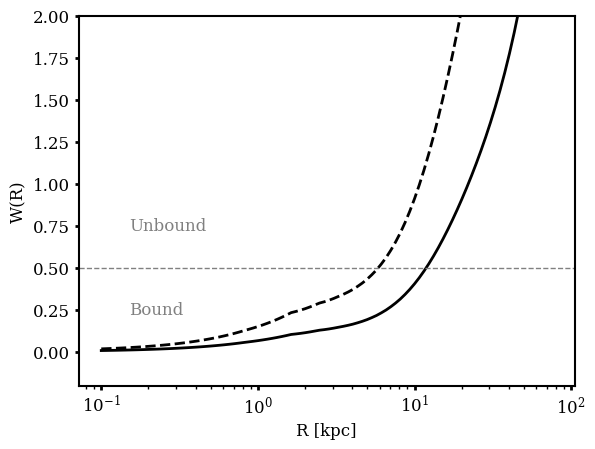

In [82]:
def W(R, rho_wind = 1e-26 * u.g / u.cm**3, v_wind = 800 * u.km / u.s, Sigma_cloud = 50 * u.Msun / u.pc**2, potential=grp.builtins.RB2006_Satellite()):
    mprof = grp.gen_mass_profile(potential)
    v_c = v_circ(mprof(R), R)

    return  (rho_wind * R * v_wind ** 2 / (Sigma_cloud * v_c ** 2)) .decompose() #(rho_wind * R * v_wind**2 / (Sigma_cloud * v_c ** 2)).decompose()


Rs = np.logspace(-1, 2, 100) * u.kpc

fig, ax = plt.subplots(1, 1)

ax.plot(Rs, W(Rs), color="black", lw=2, label="$V_{wind}$ = 800 km/s")
ax.plot(Rs, W(Rs, v_wind=1200 * u.km / u.s), color="black", lw=2, ls="--", label="$V_{wind}$ = 1200 km/s")

ax.axhline(1/2, color="Grey", ls="dashed")

ax.set(xscale='log', xlabel="R [kpc]", ylabel="W(R)", ylim=(-0.2, 2))

plt.text(0.15, 0.25, "Bound", va="center", ha="left", color="Grey")
plt.text(0.15, 0.75, "Unbound", va="center", ha="left", color="Grey")
